In [1]:
import pandas as pd
from pprint import pprint
from pandas import json_normalize 
import requests
import plotly
import plotly.express as px

In [2]:
r = requests.get('http://127.0.0.1:4000/getrest?diabetes=2')
data = r.text

In [3]:
df = pd.read_json(data, orient='records')
pprint (df)

                                        _id  Diabetes_012  HighBP  HighChol  \
0      {'$oid': '6456586978980a2b86fe08c8'}             2       1         1   
1      {'$oid': '6456586978980a2b86fe08ca'}             2       0         0   
2      {'$oid': '6456586978980a2b86fe08cd'}             2       1         1   
3      {'$oid': '6456586978980a2b86fe08d1'}             2       0         0   
4      {'$oid': '6456586978980a2b86fe08d7'}             2       1         0   
...                                     ...           ...     ...       ...   
35341  {'$oid': '6456586a78980a2b8601e79b'}             2       0         1   
35342  {'$oid': '6456586a78980a2b8601e7a4'}             2       0         1   
35343  {'$oid': '6456586a78980a2b8601e7a6'}             2       1         1   
35344  {'$oid': '6456586a78980a2b8601e7ac'}             2       1         1   
35345  {'$oid': '6456586a78980a2b8601e7af'}             2       1         1   

       Smoker  Stroke  HeartDiseaseorAttack  
0    

In [4]:
reduced_DF = df[[
          "HighBP",
          "HighChol",
          "Smoker",
          "Stroke",
          "HeartDiseaseorAttack",
]]

pprint(reduced_DF)

       HighBP  HighChol  Smoker  Stroke  HeartDiseaseorAttack
0           1         1       1       0                     1
1           0         0       1       0                     0
2           1         1       0       0                     0
3           0         0       1       0                     0
4           1         0       0       0                     0
...       ...       ...     ...     ...                   ...
35341       0         1       0       0                     0
35342       0         1       1       0                     1
35343       1         1       0       0                     1
35344       1         1       0       0                     0
35345       1         1       0       0                     1

[35346 rows x 5 columns]


In [5]:
df1 = reduced_DF.sum().reset_index(name='Sum')
collist = list(df1)
df1.index = ['High BP', 'High Cholestrol', 'Smoker', 'Stroke', 'Heart Disease']                    
#df1.index = ['BP','Cholestrol','Smoker','Stroke','Heart Disease']
#df2 = pd.DataFrame(df1,index=index_labels)
pprint(collist)
pprint(df1)


['index', 'Sum']
                                index    Sum
High BP                        HighBP  26604
High Cholestrol              HighChol  23686
Smoker                         Smoker  18317
Stroke                         Stroke   3268
Heart Disease    HeartDiseaseorAttack   7878


In [133]:
r = requests.get('http://127.0.0.1:4000/getrest?stroke=1')
data = r.text

In [134]:
df = pd.read_json(data, orient='records')
pprint (df)

                                        _id  Diabetes_012  HighBP  HighChol  \
0      {'$oid': '6456586978980a2b86fe08ce'}             0       0         1   
1      {'$oid': '6456586978980a2b86fe08d4'}             0       1         1   
2      {'$oid': '6456586978980a2b86fe08da'}             2       1         1   
3      {'$oid': '6456586978980a2b86fe08de'}             2       1         1   
4      {'$oid': '6456586978980a2b86fe08ea'}             0       0         0   
...                                     ...           ...     ...       ...   
10287  {'$oid': '6456586a78980a2b8601e6fd'}             0       1         0   
10288  {'$oid': '6456586a78980a2b8601e71b'}             0       0         1   
10289  {'$oid': '6456586a78980a2b8601e731'}             0       0         0   
10290  {'$oid': '6456586a78980a2b8601e74d'}             2       1         1   
10291  {'$oid': '6456586a78980a2b8601e7a7'}             0       1         1   

       Smoker  Stroke  HeartDiseaseorAttack  
0    

In [135]:
reduced_DF = df[[
          "HighBP",
          "HighChol",
          "Smoker",
          "Diabetes_012",
          "HeartDiseaseorAttack",
]]


pprint(reduced_DF)

       HighBP  HighChol  Smoker  Diabetes_012  HeartDiseaseorAttack
0           0         1       1             0                     0
1           1         1       0             0                     1
2           1         1       1             2                     1
3           1         1       1             2                     0
4           0         0       1             0                     0
...       ...       ...     ...           ...                   ...
10287       1         0       1             0                     1
10288       0         1       0             0                     0
10289       0         0       0             0                     0
10290       1         1       0             2                     1
10291       1         1       0             0                     1

[10292 rows x 5 columns]


In [136]:
df2= reduced_DF.query("Diabetes_012 == 2")
df3 = reduced_DF.query("HighBP == 1")
df4 = reduced_DF.query("Smoker == 1")
df5 = reduced_DF.query("HighChol==1")
df6 = reduced_DF.query("HeartDiseaseorAttack==1")
df2 = df2.count()[0]
df3 = df3.count()[0]
df4 = df4.count()[0]
df5 = df5.count()[0]
df6 = df6.count()[0]
pprint(df2)
pprint(df3)
pprint(df4)
pprint(df5)
pprint(df6)

3268
7625
6082
6656
3937


In [112]:
index_labels = ['Diabetes','High BP','Smoker','High Chol',"Heart Disease"]
index_values = [df2,df3,df4,df5,df6]

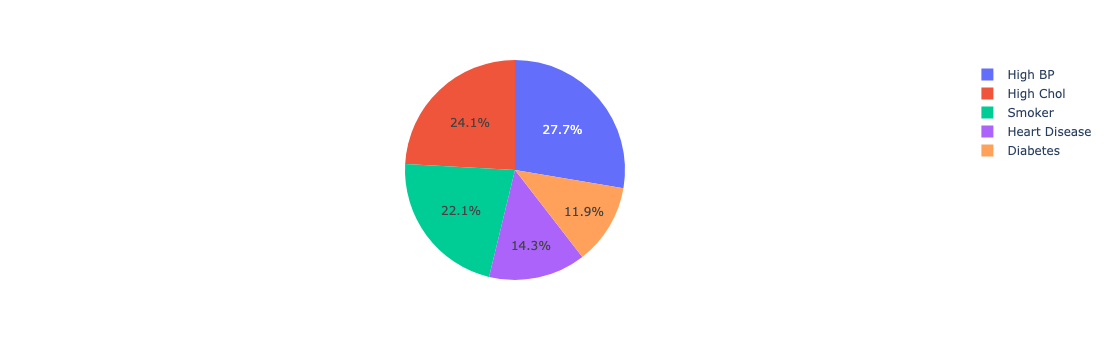

In [113]:
fig1 = px.pie(index_labels, values = index_values, names = index_labels)
fig1.show()